In [456]:
# Загружаем библиотеки 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc

In [349]:
# список файлы данных с https://github.com/devua/csv/tree/master/salaries
files = {
'11_1':'https://raw.githubusercontent.com/devua/csv/master/salaries/2011_dec_final.csv',
'11_2':'https://raw.githubusercontent.com/devua/csv/master/salaries/2011_may_final.csv',
'12_1':'https://raw.githubusercontent.com/devua/csv/master/salaries/2012_dec_final.csv',
'12_2':'https://raw.githubusercontent.com/devua/csv/master/salaries/2012_may_final.csv',
'13_1':'https://raw.githubusercontent.com/devua/csv/master/salaries/2013_dec_final.csv',
'13_2':'https://raw.githubusercontent.com/devua/csv/master/salaries/2013_may_final.csv',
'14_1':'https://raw.githubusercontent.com/devua/csv/master/salaries/2014_dec_final.csv',
'14_2':'https://raw.githubusercontent.com/devua/csv/master/salaries/2014_may_final.csv',
'15_1':'https://raw.githubusercontent.com/devua/csv/master/salaries/2015_dec_final.csv',
'15_2':'https://raw.githubusercontent.com/devua/csv/master/salaries/2015_may_final.csv',
'16_1':'https://raw.githubusercontent.com/devua/csv/master/salaries/2016_dec_final.csv',
'16_2':'https://raw.githubusercontent.com/devua/csv/master/salaries/2016_may_final.csv',
'17_1':'https://raw.githubusercontent.com/devua/csv/master/salaries/2017_dec_final.csv',
'17_2':'https://raw.githubusercontent.com/devua/csv/master/salaries/2017_jun_final.csv',
'18_1':'https://raw.githubusercontent.com/devua/csv/master/salaries/2018_dec_final.csv',
'18_2':'https://raw.githubusercontent.com/devua/csv/master/salaries/2018_june_final.csv',
'19_1':'https://raw.githubusercontent.com/devua/csv/master/salaries/2019_june_final.csv'}

In [463]:
# Берем 14 и 19 года
files['14_1'], files['19_1']

('https://raw.githubusercontent.com/devua/csv/master/salaries/2014_dec_final.csv',
 'https://raw.githubusercontent.com/devua/csv/master/salaries/2019_june_final.csv')

In [464]:
# Данные забираем и сохраняем локально
data_14_1_1 = pd.read_csv(files['14_1'])
data_14_1_1.to_csv('14_1.csv')

data_19_1_1 = pd.read_csv(files['19_1'])
data_19_1_1.to_csv('19_1.csv')

del data_19_1_1, data_14_1_1

gc.collect()

245

In [465]:
# Берем данные за 14 год (загружаем локально)
data_14_1 = pd.read_csv('14_1.csv')

# Берем данные за 19 год ()
data_19_1 = pd.read_csv('19_1.csv')

In [466]:
# Берем только необходимые колонки
data_14_1 = data_14_1[['Должность', 'Общий.опыт.работы', 'Зарплата.в.месяц']]
data_19_1 = data_19_1[['Должность', 'Общий.опыт.работы', 'Зарплата.в.месяц']]
# Меняем названия колонок 
data_14_1.columns = ['Position', 'Experience', 'Salary']
data_19_1.columns = ['Position', 'Experience', 'Salary']
# Создаем словарь что бы убрать не цифировые категории и обновляем данные созданным словарем
data_14_1 = data_14_1.replace({'10 и более лет': 10, 'меньше 3 месяцев': 0.1})
data_19_1 = data_19_1.replace({'10 и более лет': 10, 'меньше 3 месяцев': 0.1})
# Переводим значения опыта в цифры
data_14_1['Experience'] = data_14_1['Experience'].astype(float)
data_19_1['Experience'] = data_19_1['Experience'].astype(float)
# Удаляем лишнее
#del data_19_1, data_14_1
gc.collect()

28

Обращаем внимание на присутствие других специалистов и специальностей в опросе. 
Оставляем только програмистов, на основании субъективной оценки. (Прошу прошения, если не верно определил категорию) 

In [467]:
# Проверям тип данных, полноту
data_14_1.info(), data_19_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6514 entries, 0 to 6513
Data columns (total 3 columns):
Position      6514 non-null object
Experience    6514 non-null float64
Salary        6514 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 152.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11439 entries, 0 to 11438
Data columns (total 3 columns):
Position      11439 non-null object
Experience    11439 non-null float64
Salary        11439 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 268.2+ KB


(None, None)

In [469]:
# Список специальностей, которые не учитываем в анализе 14 год
drop_list_14 = ['Team lead', 'Project manager',
       'Technical Lead', 'Верстальщик',
       'Support', 'Director of Engineering / Program Director',
       'HR', 'Системный администратор',
       'Бизнес-аналитик', 
       'Scrum Master', 'Гейм-дизайнер', 'Технический писатель',
       'Sales manager', 'Product Manager',
       'Senior Project Manager / Program Manager', 'Дизайнер',
       'Researcher']

# Список специальностей, которые не учитываем в анализе 19 год
drop_list_19 = ['Project manager', 'Business analyst', 'Designer', 'Product Manager', 'Technical Lead', 
             'Support', 'HR', 'Marketing', 'Technical writer', 'Team lead', 
             'Senior Project Manager / Program Manager',
            'Director of Engineering / Program Director', 'Copywriter', 'ERP / CRM', 
            'Sales manager', 'Game designer', 'Talent Researcher', 'Scrum Master', 'Security Specialist']

In [470]:
# Меняем индекс по типу должности
data_14_1 = data_14_1.set_index('Position')
data_19_1 = data_19_1.set_index('Position')
# Удаляем специальности по списку
data_14_1.drop(drop_list_14, inplace=True)
data_19_1.drop(drop_list_19, inplace=True)
# Обновляем индекс
data_14_1.reset_index(inplace=True)
data_19_1.reset_index(inplace=True)

In [471]:
# Строка здесь это отдельный результат опроса, колонки переменные.
display(data_14_1.head(), data_19_1.head())
print('Всего опрошеных програмистов: \n \
      {} чел. в 14 году и {} в 19 году'.format(len(data_14_1), len(data_19_1)))

,Position,Experience,Salary
0,Software Engineer,5.5,3200
1,Software Engineer,4.5,2235
2,Software Engineer,3.5,2200
3,Software Engineer,3.0,1000
4,Software Engineer,2.0,2400


,Position,Experience,Salary
0,Senior Software Engineer,7.0,3400
1,QA engineer,1.5,2800
2,Senior Software Engineer,10.0,2000
3,Senior Software Engineer,10.0,8000
4,Software Engineer,5.0,3200


Всего опрошеных програмистов: 
       4841 чел. в 14 году и 8421 в 19 году


In [472]:
# Группируем, считаем 19 год, смотрим на данные 
display(pd.DataFrame(data_19_1.groupby(['Experience'])['Salary'].mean().sort_values(ascending=False)), \
        pd.DataFrame(data_19_1.groupby(['Position'])['Salary'].mean().sort_values(ascending=False)), \
        data_19_1.Position.value_counts())

,Salary
Experience,
10.00,3518.407989
8.00,3323.829167
7.00,3289.386167
6.00,3057.543578
9.00,3051.000000
5.00,2773.166667
4.00,2479.441777
3.00,2006.226852
2.00,1477.726962


,Salary
Position,
System Architect,5439.160920
Senior Software Engineer,3698.838444
QA Tech Lead,3180.054264
Senior QA engineer,2671.744745
DevOps,2602.092527
DBA,2300.962963
Research Engineer,2179.583333
Data Scientist,2142.577236
Software Engineer,1984.152245


Software Engineer           2739
Junior Software Engineer    1476
Senior Software Engineer    1337
QA engineer                  933
Junior QA engineer           513
Senior QA engineer           333
DevOps                       281
Sysadmin                     207
QA Tech Lead                 129
Data Scientist               123
Data Analyst                 106
HTML coder                   106
System Architect              87
DBA                           27
Research Engineer             24
Name: Position, dtype: int64

Обращаем внимание на тип позиций которые указаны Junior and Senior. Считаем для них средние значения стажа, среднеквадратические отклонения. Возможно это можно использовать для сегментации других специальностей где не указан уровень квалификации. 

Для валидации 19 года проверим процентные отношения кто указал свой уровень, к общему количеству опрошеных. Получаем 43%, что должно нас устроить. 

In [473]:
print(((data_19_1.groupby('Position')['Experience'].count()['Junior Software Engineer']) + \
(data_19_1.groupby('Position')['Experience'].count()['Senior Software Engineer']) + \
(data_19_1.groupby('Position')['Experience'].count()['Junior QA engineer']) + \
(data_19_1.groupby('Position')['Experience'].count()['Senior QA engineer']) )/ len(df)*100)

43.45089656810355


Делаем разбивку и считаем средние и отклонения

In [474]:
se_m_Junior = data_19_1.groupby('Position')['Experience'].mean()['Junior Software Engineer']
se_std_Junior = data_19_1.groupby('Position')['Experience'].std(ddof=1)['Junior Software Engineer']

se_m_Senior = data_19_1.groupby('Position')['Experience'].mean()['Senior Software Engineer']
ex_std_Senior = data_19_1.groupby('Position')['Experience'].std(ddof=1)['Senior Software Engineer']

qa_m_Junior = data_19_1.groupby('Position')['Experience'].mean()['Junior QA engineer']
qa_std_Junior = data_19_1.groupby('Position')['Experience'].std(ddof=1)['Junior QA engineer']

qa_m_Senior = data_19_1.groupby('Position')['Experience'].mean()['Senior QA engineer']
qa_std_Senior = data_19_1.groupby('Position')['Experience'].std(ddof=1)['Senior QA engineer']

data_frame = [se_m_Junior, se_std_Junior, se_m_Senior, ex_std_Senior, \
              qa_m_Junior, qa_std_Junior, qa_m_Senior, qa_std_Senior]

df1 = pd.DataFrame(data_frame, index=['Среднее для SE Junior', 'std для SE Junior', 
                               'Среднее для SE Senior', 'std для SE Senior',
                               'Среднее для QA Junior', 'std для QA Junior',
                               'Среднее для QA Senior', 'std для QA Senior'], \
             columns=['Years_of_experince'])
display(df1)

,Years_of_experince
Среднее для SE Junior,1.040786
std для SE Junior,0.923035
Среднее для SE Senior,6.762004
std для SE Senior,2.408482
Среднее для QA Junior,0.827680
std для QA Junior,0.613013
Среднее для QA Senior,5.693994
std для QA Senior,2.130620


Получается, что средний опыт работы  в 19 году (кто его указал) для SE Junior год, с достаточно широким отклонением в один год. Больше всего опыта у SE Senior c так же большим отклонением в 2,4 года. 
Если попытаться расчитать Middle и использовать средний стаж у тех кто его указал, для категоризации того кто его не указал, то мы можем не верно кластеризировать всю выборку. Особенно сильно будем ошибаться на других специальностях (не SE and QA). Данных слишком мало, что бы их на основании только указанных лет работы. 

/home/volodymyr/Downloads/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Распределение зарплат')

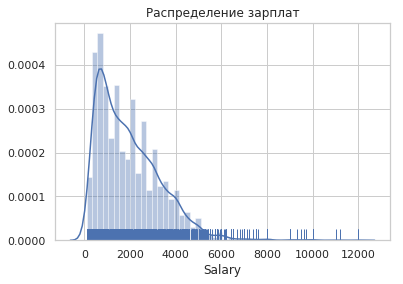

In [475]:
sns.distplot(data_19_1['Salary'], rug=True, norm_hist=True)
plt.title('Распределение зарплат')

Значительные outliers

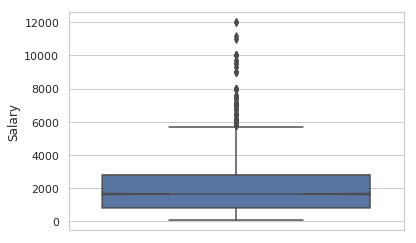

In [476]:
sns.boxplot(x='Salary', data=data_19_1, orient='v', notch=True)

/home/volodymyr/Downloads/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


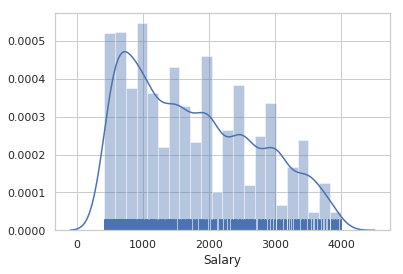

In [477]:
df_new = data_19_1[(data_19_1['Salary'] > 400) & (data_19_1['Salary'] < 4000)]
sns.distplot(df_new['Salary'], rug=True, norm_hist=True)

In [478]:
df_new.reset_index()
df_new.loc[df_new.Salary <= 1200, 'level'] = 'Junior'
df_new.loc[(df_new.Salary > 1200) & (df_new.Salary <= 2400), 'level'] = 'Middle'
df_new.loc[df_new.Salary > 2401, 'level'] = 'Senior'

/home/volodymyr/Downloads/conda/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/volodymyr/Downloads/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


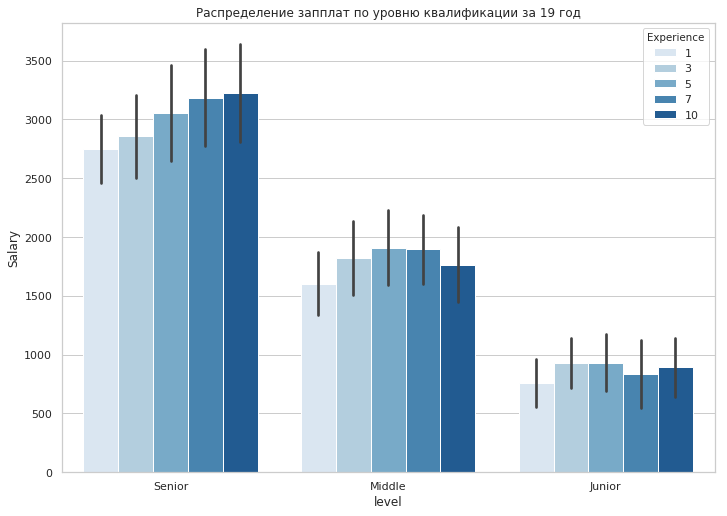

In [479]:
sns.set(style="whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.title('Распределение запплат по уровню квалификации за 19 год')
sns.barplot(x='level', y='Salary', hue='Experience', hue_order=[1,3,5,7,10], palette='Blues',  \
            data=df_new, ci='sd')

дополнительно можно расчитать плотность распределения для каждой группы. Для Senior функция ближе к x2, для Junior она больше выглядит линейно.

Text(0, 0.5, 'Плотность распределения')

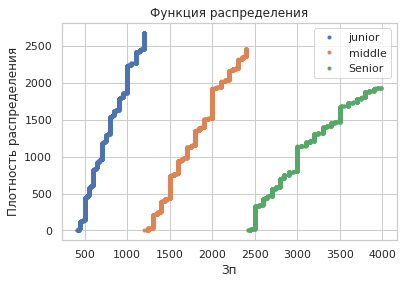

In [480]:
def edf(data):
    x = np.sort(data)
    y = np.arange(1, len(data) + 1)
    return x, y

x1, y1 = edf(df_new[df_new['level'] == 'Junior']['Salary'].values)
x2, y2 = edf(df_new[df_new['level'] == 'Middle']['Salary'].values)
x3, y3 = edf(df_new[df_new['level'] == 'Senior']['Salary'].values)

plt.plot(x1, y1, linestyle='none', marker='.')
plt.plot(x2, y2, linestyle='none', marker='.')
plt.plot(x3, y3, linestyle='none', marker='.')
plt.legend(['junior', 'middle', 'Senior'])

plt.title('Функция распределения')
plt.xlabel('Зп')
plt.ylabel('Плотность распределения')

Итак формируем нулевую гипотезу (ту самую которую нужно опровергнуть)
Тут много вариантов (например): 
    Зависимость зарплаты от стажа в 14 году такие же как в 19м.
    Зарплаты junior не изменились с 14 года.

Как стало понятно - указанный стаж плохой индикатор, а расчет по отдельным категориям может запутать. Поэтому берем простой и более предметный вариант: **Средний уровень зп в 14 году, такой же как в 19 году**

Верность гипотезы, несмотря на всю ее очевидность, мы сможем точно проверить увидив доверительные интервалы и расчитав P-value.

Предварительные расчеты среднего уровня и доверительных интервалов

In [481]:
# Считаем среднии зп по всей выборке (14 и 19 года), рассчитываем доверительный интервал 95 %

mean_salary_14 = np.mean(data_14_1['Salary'])
conf_salary_14 = np.percentile(data_14_1['Salary'], [2.5, 97.5])

mean_salary_19 = np.mean(data_19_1['Salary'])
conf_salary_19 = np.percentile(data_19_1['Salary'], [2.5, 97.5])

diff_mean_salary = mean_salary_19 - mean_salary_14

print(
"""Средняя зп в 14 году {}$, где доверительный интервал 95% [{} {}] \n
Средняя зп в 19 году {}$, где доверительный интервал 95% [{} {}] \n
Разница в средних зарплатах в 14 и 19 году: {}$
""".format(round(mean_salary_14), *conf_salary_14, round(mean_salary_19), *conf_salary_19, \
           round(diff_mean_salary)))

Средняя зп в 14 году 1797$, где доверительный интервал 95% [300.0 4000.0] 

Средняя зп в 19 году 1949$, где доверительный интервал 95% [300.0 5000.0] 

Разница в средних зарплатах в 14 и 19 году: 152$



Уровень вырос примерно на 8.5% сдвинув вернюю границу интервала на 1к. Приятно радует! Хотя могло быть больше ) 

Логично выбрать именно средние значения в качестве нашей метрики. Возможны и другие варианты, например медиана, что часто делают в случае значительных outliers. Однако средняя проста в понимании и тоже неплохо даст необходимое представление 

Пишем bootstrapping функцию.

In [482]:
# Функция для bootstraping
def bootstrap(data, func):
    boots = np.random.choice(data, len(data))
    return func(boots)

def bootstrapping(data, func=np.mean, size=1):
    reps = np.empty(size)
    for i in range(size):
        reps[i] = bootstrap(data, func)
    return reps

In [483]:
# Обьеденяем 14 и 19 года
data = np.concatenate((data_14_1['Salary'].values, data_19_1['Salary'].values))

# Считаем среднее значение за 2 года 
data_mean = np.mean(data)

# Создаем изменные массивы данных за 14 и 19 года
data_14_shifted = data_14_1['Salary'].values - np.mean(data_14_1['Salary'].values) + data_mean
data_19_shifted = data_19_1['Salary'].values - np.mean(data_19_1['Salary'].values) + data_mean

# Генерируем 10000 копий массивов
data_14_bootsted = bootstrapping(data_14_shifted, np.mean, size=10000)
data_19_bootsted = bootstrapping(data_19_shifted, np.mean, size=10000)

# Считаем разницу в средних в сгенерированных массивах
mean_diff = data_19_bootsted - data_14_bootsted

# Рассчитываем P value
p_value = sum(mean_diff >= diff_mean_salary) / len(mean_diff)

print('p-value = {}'.format(p_value))

p-value = 0.0


Значения p-value до 0,05 считаются незначительными, а в нашем случае оно равно = 0. Что означает, нулевая гипотеза опровергнута - средние значения зарплат в 14 году и 19 году разные и это не случайный результат или значительное количество outliers. 

Сгенерированные нами 10 тыс подобных массивов, в среднем не смогли получить в сумме большей таких отклонениий, чем непосредственно сами данные. 

Хотя мы потратили много внимания на первые два этапа, мы сформулировали правильную гипотезу и выбрали верную метрику. В более сложных задачах, с большим количеством переменных, без предворительных этапов, аналитика может привести к неверным решениям. Не стоит их пропускать.

В результате нашего исследования уровня зарплат мы пришли к следующим выводам:
    1. Исходя из данных опроса, стаж не совсем хороших критерий для определения уровня зарплат и квалификации.
    2. Разделение на уровень квалификации точнее всего будет проводиться на основании уровня зарплат.
    3. Зарплаты програмистов с 14 года по 19 выросли. В среднем на 8.5%.

*** Спасибо за Ваше внимание ***

Буду рад коментариям и критике